In [1]:
import pandas as pd 
import numpy as np

import matplotlib as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('./DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


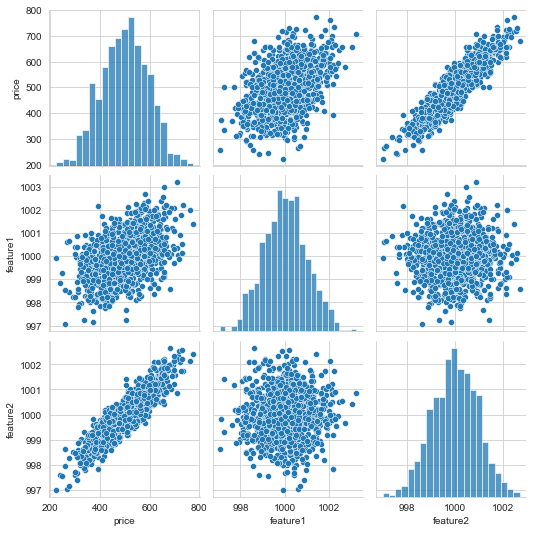

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df[['feature1','feature2']].values
y=df['price'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()

In [10]:
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [12]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
import tensorflow as tf


In [31]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))

model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

#loss
#for multi-class 'categorical_crossentropy'
#for binary 'categorical_crossentropy'
#for mean squared error regression 'mse'

In [32]:
model.fit(x=X_train,y=y_train,epochs=250)
#1 epoch = model went through training test 1 time

Epoch 1/250
22/22 [==============================] - 1s 665us/step - loss: 256713.8906
Epoch 2/250
22/22 [==============================] - 0s 760us/step - loss: 256689.4688
Epoch 3/250
22/22 [==============================] - 0s 712us/step - loss: 256667.4219
Epoch 4/250
22/22 [==============================] - 0s 712us/step - loss: 256645.5156
Epoch 5/250
22/22 [==============================] - 0s 760us/step - loss: 256623.6562
Epoch 6/250
22/22 [==============================] - 0s 760us/step - loss: 256601.7344
Epoch 7/250
22/22 [==============================] - 0s 760us/step - loss: 256579.8438
Epoch 8/250
22/22 [==============================] - 0s 712us/step - loss: 256557.9844
Epoch 9/250
22/22 [==============================] - 0s 760us/step - loss: 256536.0625
Epoch 10/250
22/22 [==============================] - 0s 760us/step - loss: 256514.1250
Epoch 11/250
22/22 [==============================] - 0s 760us/step - loss: 256492.2812
Epoch 12/250
22/22 [=====================

In [29]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

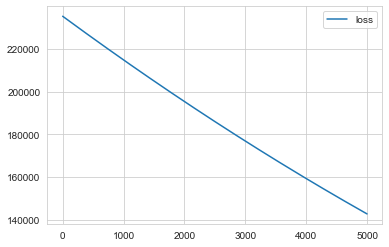

In [30]:
loss_df.plot()

In [17]:
model.evaluate(x=X_test,y=y_test)

10/10 [==============================] - 0s 665us/step - loss: 253687.7656


253687.765625

In [18]:
test_predictions=model.predict(X_test)

10/10 [==============================] - 0s 554us/step


In [19]:
test_predictions=pd.Series(test_predictions.reshape(300,))

In [20]:
pred_df=pd.DataFrame(y_test,columns=['test true y'])
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [21]:
new_gem=[[998,1000]]

In [22]:
new_gem=scaler.transform(new_gem)

In [23]:
model.predict(new_gem)

1/1 [==============================] - 0s 12ms/step


array([[5.505918]], dtype=float32)

In [24]:
model.save('my_gem_model.h5')

In [25]:
later_model = tensorflow.keras.models.load_model('my_gem_model.h5')

NameError: name 'tensorflow' is not defined